In [15]:
import math
from pprint import pprint
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Define utility functions

In [27]:
def df_unique_value(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or coltype.name == 'category':
            print(f'{c:10}\n{df[c].unique()}')
            print('-' * 65)
            
def convert_cols_to_category(df, cols:list):
    """
    convert 'cols' to 'category'
    """
    for c in df[cols]:
        df[c] = df[c].astype('category')
    return df

def convert_obj_columns_to_category(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or coltype.name == 'category':
            df[c] = df[c].astype('category')
    return df

def print_category_columns(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type.name == 'category':
#             print(f'{c}: {df[c].cat.categories}')
#             print(pd.Series(df[c].cat.categories))
            print(f'{c:15}: {list(enumerate(df[c].cat.categories))}')
            print('-' * 60)
        
def plot_mn(df, cols, n_rows:int=1, kind:str='boxplot', color='salmon'):
    n = len(cols)
    n_cols = math.ceil(n/n_rows)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*4))
    ax = ax.ravel()

    fig.tight_layout()
    for i,c in enumerate(cols):
        col_type = df[c].dtype
        if col_type.name == 'category':
            sns.countplot(data=df, x=c, ax=ax[i])
        else:
            if kind.lower()=='boxplot':
                sns.countplot(data=df[[c]], ax=ax[i], color=color)
            elif kind.lower()=='violin':
                sns.violinplot(data=df[[c]], ax=ax[i], color=color)
            elif kind.lower()=='hist':
                    sns.distplot(df[c], hist=True, kde=False, ax=ax[i], color=color)

# Data Exploration

In [18]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/titanic_train.csv')
df.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
512,513,1,1,"McGough, Mr. James Robert",male,36.00,0,0,PC 17473,26.2875,E25,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.00,0,0,364512,8.0500,NaN,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.00,1,0,PC 17603,59.4000,NaN,C
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
294,295,0,3,"Mineff, Mr. Ivan",male,24.00,0,0,349233,7.8958,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
836,837,0,3,"Pasic, Mr. Jakob",male,21.00,0,0,315097,8.6625,NaN,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
cols_to_cat=[ 'Pclass', 'Sex', 'Embarked']

convert_cols_to_category(df, cols_to_cat)
print_category_columns(df)

Pclass         : [(0, 1), (1, 2), (2, 3)]
------------------------------------------------------------
Sex            : [(0, 'female'), (1, 'male')]
------------------------------------------------------------
Embarked       : [(0, 'C'), (1, 'Q'), (2, 'S')]
------------------------------------------------------------


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.8+ KB


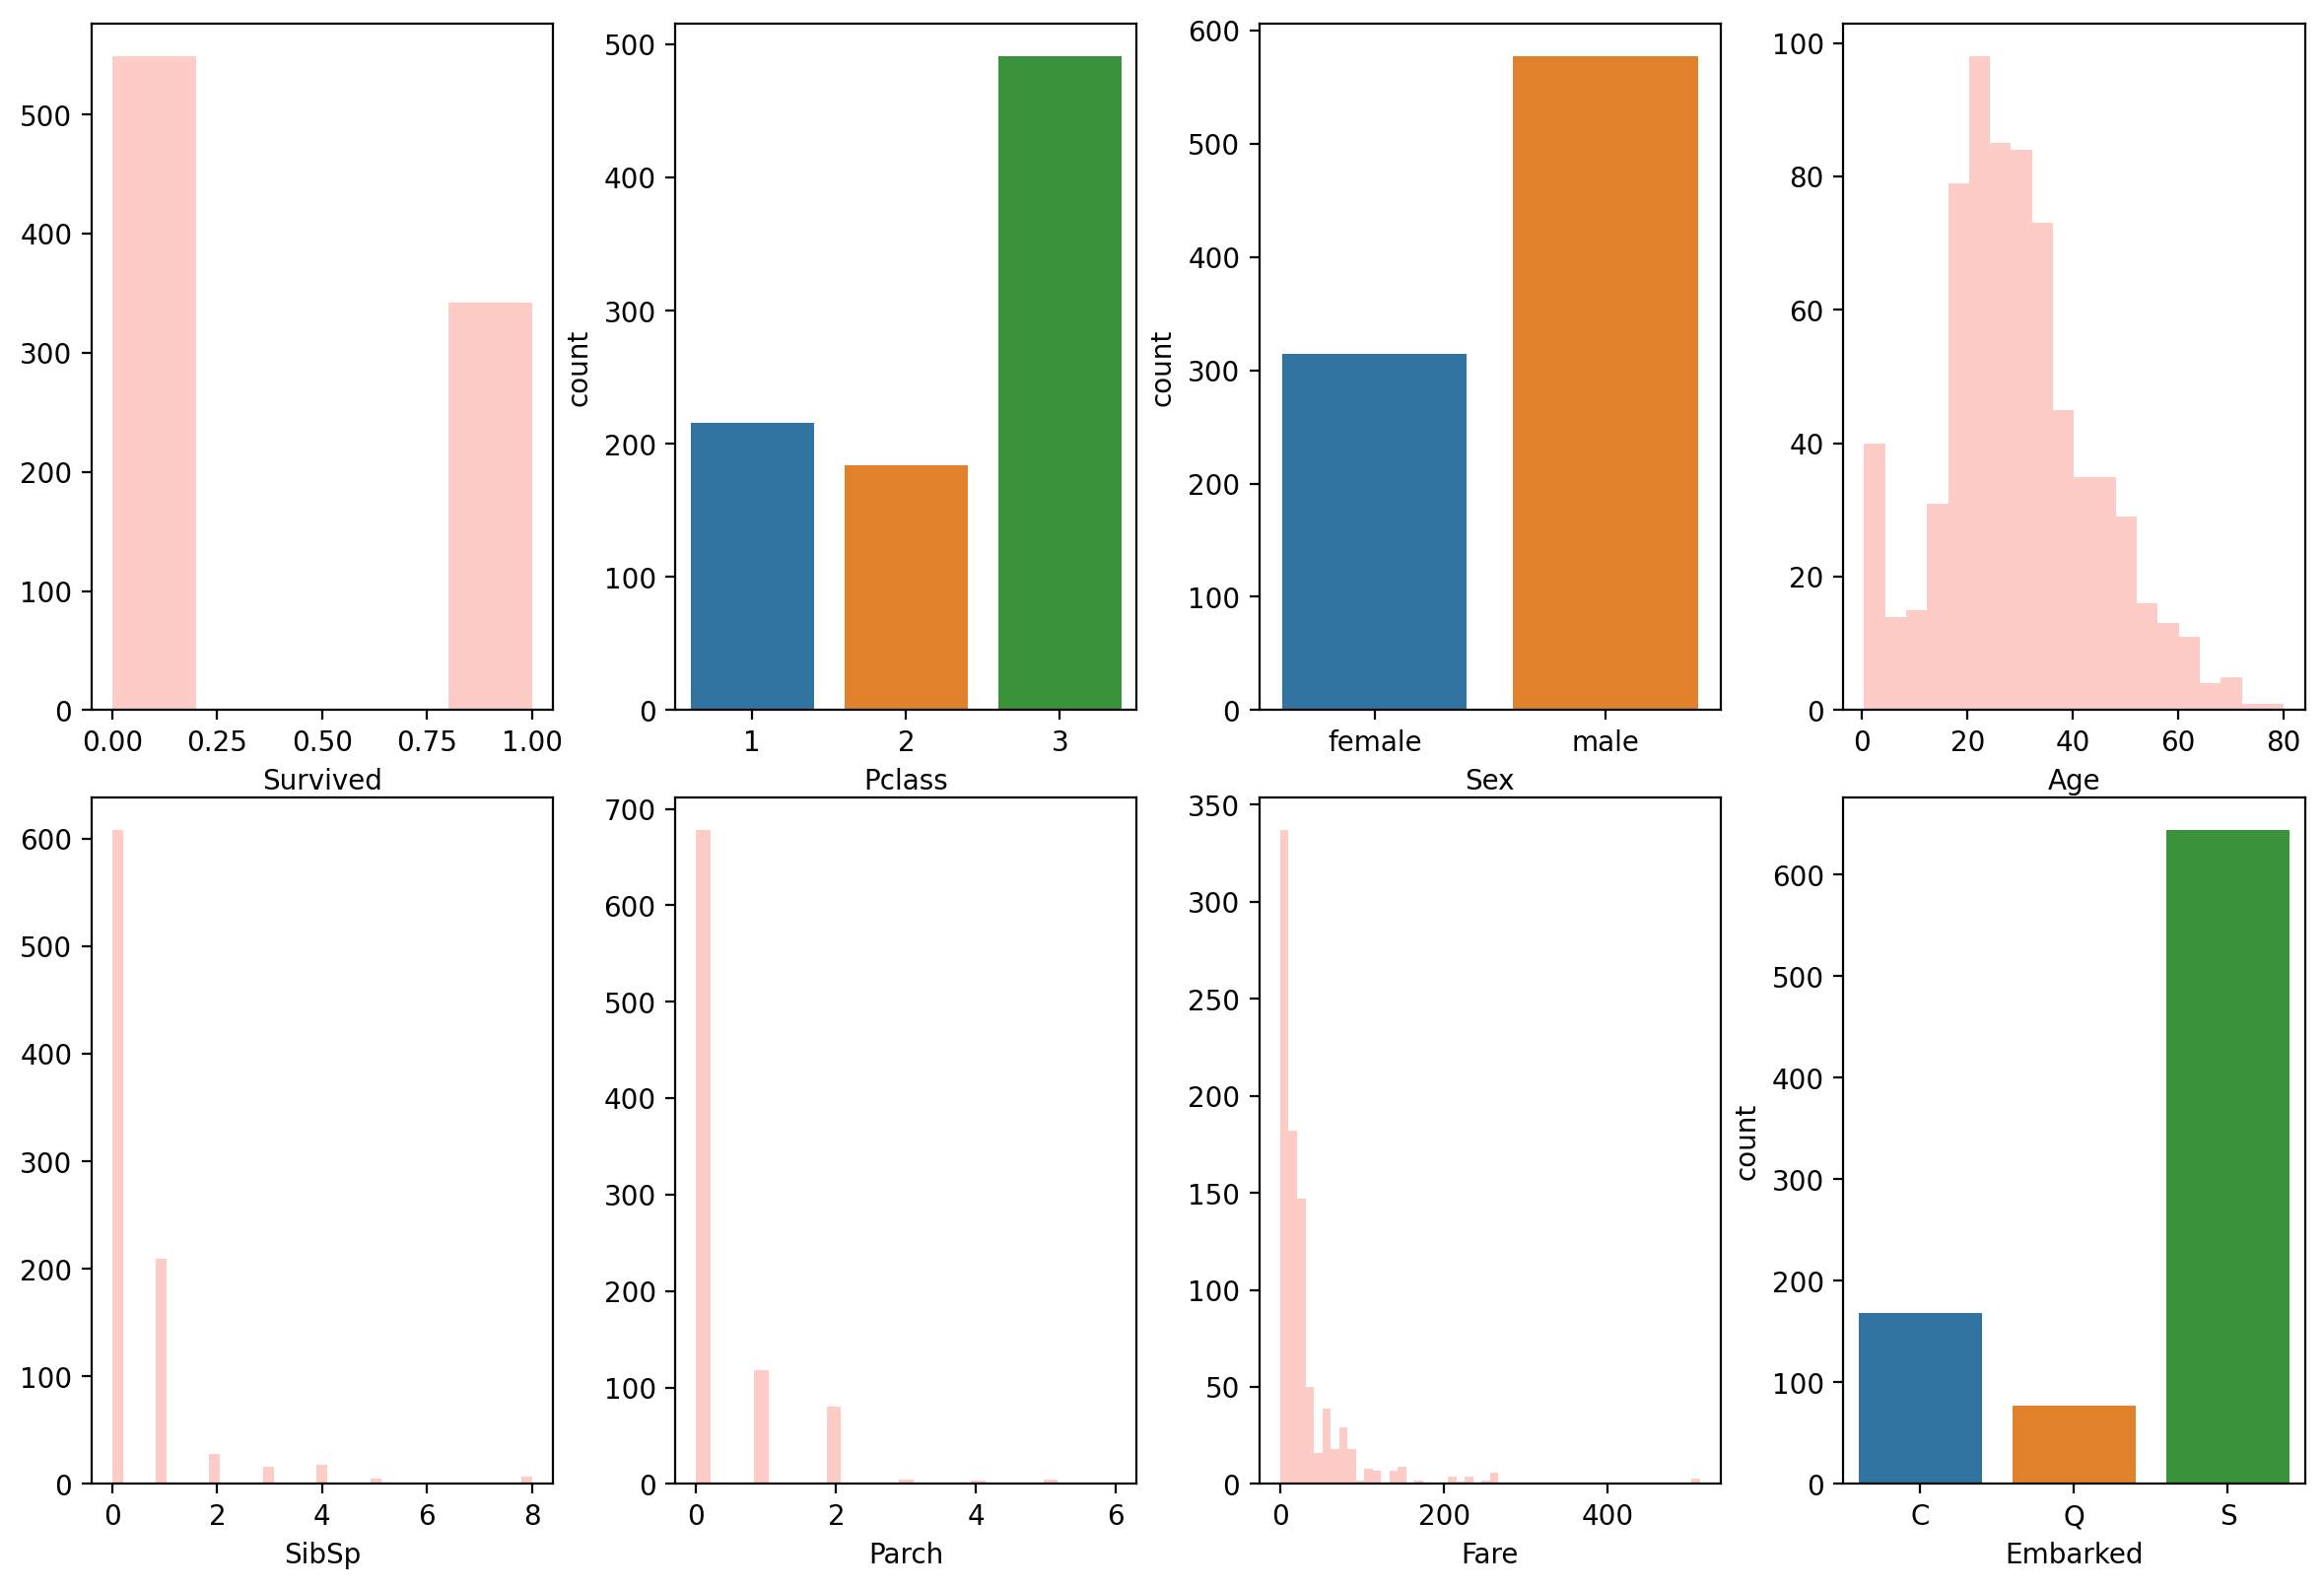

In [28]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
plot_mn(df, cols, 2, 'hist')

In [73]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, ShuffleSplit, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score, ConfusionMatrixDisplay

In [40]:
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
feature_cols=['Pclass','Sex', 'Age', 'SibSp', 'Parch' ]
target_col='Survived'
X=df[feature_cols]
y=df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [44]:
y_train.value_counts()

Survived
0    439
1    273
Name: count, dtype: int64

In [45]:
clf=lgb.LGBMClassifier()

In [46]:
clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [47]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}
#clf = lgb.LGBMClassifier(**params)

# Train and Evaluate the model

In [51]:
fit_params={'early_stopping_rounds': 100,
                   'eval_metric': 'auc', #[binary_Logloss, auc]
                   'eval_set': [(X_test, y_test)],
                   'verbose': 10
                   }
clf.fit(X_train, y_train, **fit_params)

[10]	valid_0's auc: 0.861001	valid_0's binary_logloss: 0.462338
[20]	valid_0's auc: 0.86996	valid_0's binary_logloss: 0.419414
[30]	valid_0's auc: 0.868709	valid_0's binary_logloss: 0.409488
[40]	valid_0's auc: 0.869829	valid_0's binary_logloss: 0.410124
[50]	valid_0's auc: 0.866601	valid_0's binary_logloss: 0.415623
[60]	valid_0's auc: 0.863175	valid_0's binary_logloss: 0.421308
[70]	valid_0's auc: 0.855995	valid_0's binary_logloss: 0.425925
[80]	valid_0's auc: 0.855731	valid_0's binary_logloss: 0.429418
[90]	valid_0's auc: 0.854677	valid_0's binary_logloss: 0.434468
[100]	valid_0's auc: 0.854414	valid_0's binary_logloss: 0.436328


LGBMClassifier()

In [52]:
clf.__dict__

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': None,
 'n_jobs': -1,
 'silent': 'warn',
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x1eb9d6b7610>,
 '_evals_result': {'valid_0': OrderedDict([('auc',
                [0.8640316205533597,
                 0.8654150197628458,
                 0.8624505928853755,
                 0.8602766798418973,
                 0.8601449275362318,
                 0.8635046113306983,
                 0.8617918313570487,
                 0.8586297760210804,
                 0.8600790513833992,
                 0.8610013175230566,
                 0.8648221343873518,
                 0.8668642951251647,
                 0.86

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

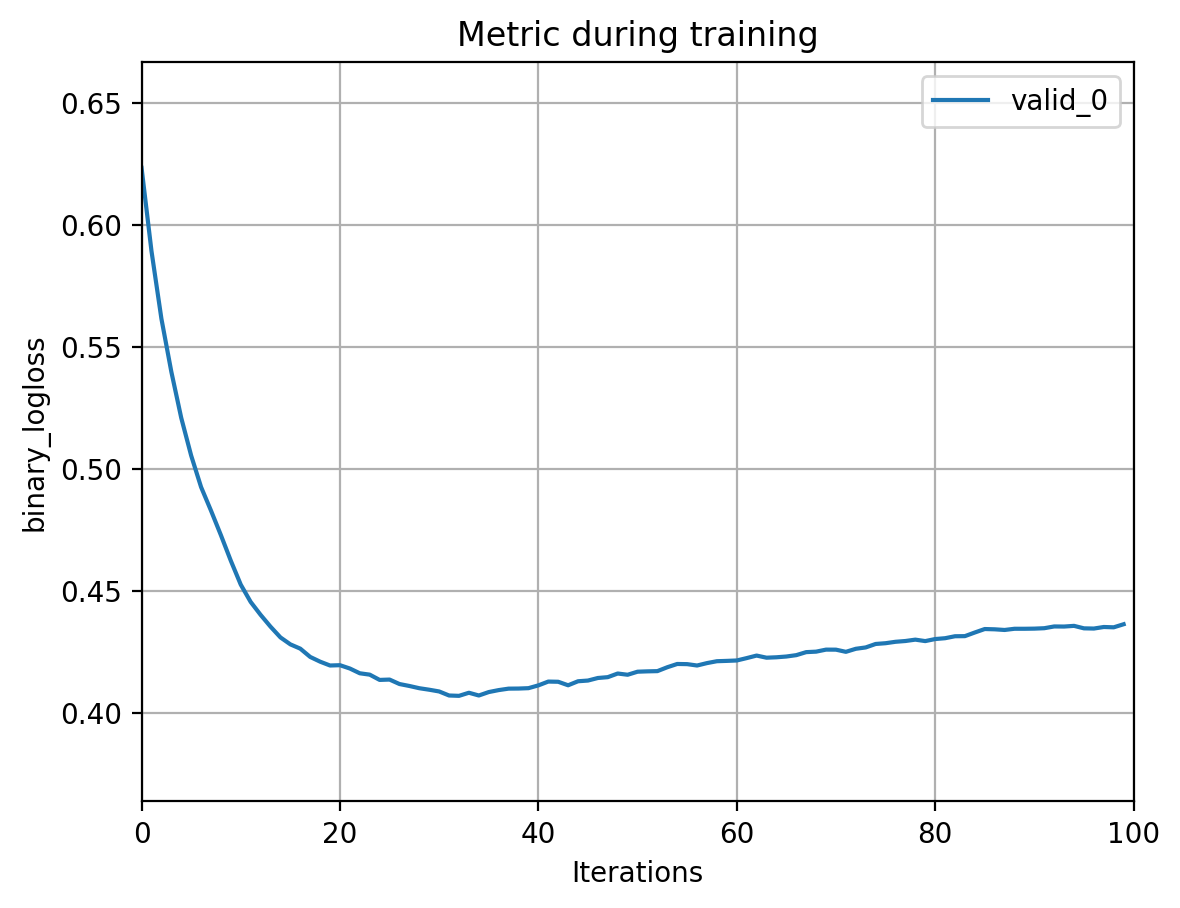

In [53]:
lgb.plot_metric(clf, metric='binary_logloss')

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='auc'>

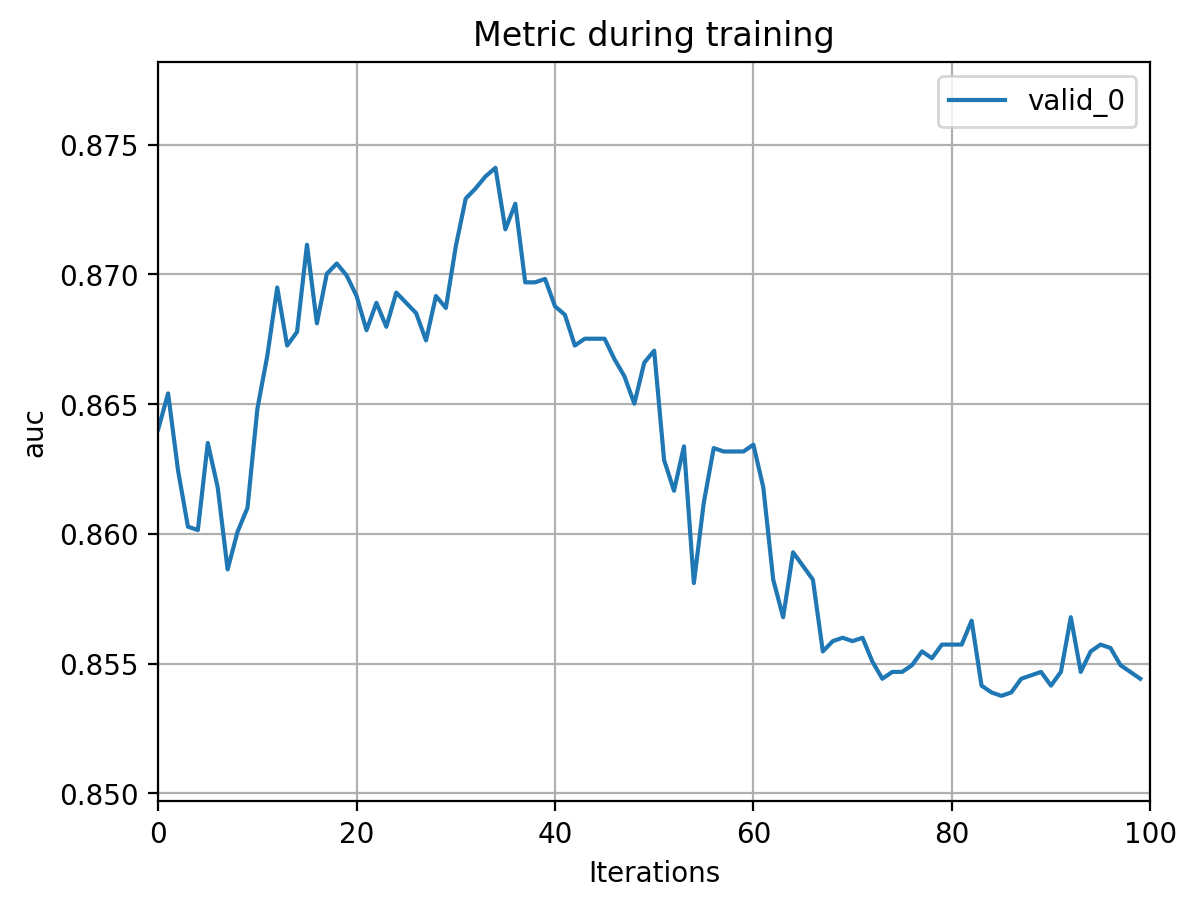

In [54]:
lgb.plot_metric(clf, metric='auc')

In [55]:
clf.score(X_train, y_train)

0.8665730337078652

In [56]:
clf.score(X_test, y_test)

0.8268156424581006

In [57]:
clf.predict(X_test)[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [58]:
clf.predict_proba(X_test)[:20]

array([[0.91360286, 0.08639714],
       [0.79197245, 0.20802755],
       [0.80852233, 0.19147767],
       [0.95671841, 0.04328159],
       [0.87389583, 0.12610417],
       [0.91130764, 0.08869236],
       [0.84509911, 0.15490089],
       [0.76564625, 0.23435375],
       [0.95559406, 0.04440594],
       [0.83967771, 0.16032229],
       [0.08795388, 0.91204612],
       [0.76564625, 0.23435375],
       [0.68397793, 0.31602207],
       [0.91708487, 0.08291513],
       [0.03112827, 0.96887173],
       [0.71875991, 0.28124009],
       [0.90086911, 0.09913089],
       [0.16406639, 0.83593361],
       [0.46702718, 0.53297282],
       [0.95559406, 0.04440594]])

# Confusion Matrix

In [60]:
cm = confusion_matrix(y_test, clf.predict(X_test))
cm

array([[97, 13],
       [18, 51]], dtype=int64)

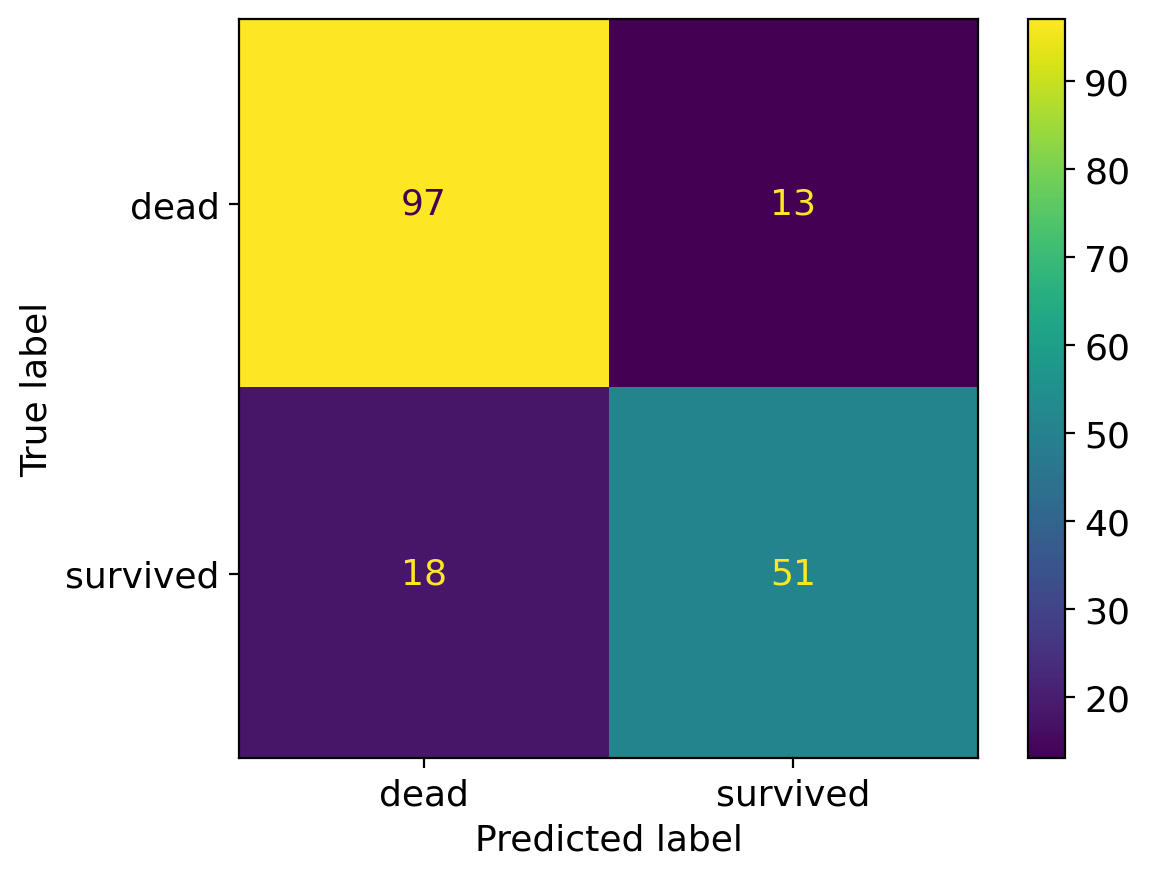

In [74]:
plt.rcParams['font.size']=13
plot_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dead', 'survived'])
plot_cm.plot()
plt.show()

# Classification Report

In [75]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       439
           1       0.88      0.75      0.81       273

    accuracy                           0.87       712
   macro avg       0.87      0.85      0.85       712
weighted avg       0.87      0.87      0.86       712



In [76]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

